<a href="https://colab.research.google.com/github/harakenken22/diveintocode-ml/blob/master/Sprint_23_LSTM_HARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

【問題1】各種手法の実行
----
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN
GRU
LSTM
ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


keras-apache-mxnet/imdb_lstm.py at master · awslabs/keras-apache-mxnet


ConvLSTM2Dのサンプルコード


keras-apache-mxnet/conv_lstm.py at master · awslabs/keras-apache-mxnet


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。すべて実行する上での実行時間を考慮した数に設定してください。

In [2]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 226s 285ms/step - loss: 0.5320 - accuracy: 0.7152 - val_loss: 0.3784 - val_accuracy: 0.8333
Epoch 2/15
782/782 [==============================] - 222s 284ms/step - loss: 0.2452 - accuracy: 0.9017 - val_loss: 0.4002 - val_accuracy: 0.8313
Epoch 3/15
782/782 [==============================] - 224s 287ms/step - loss: 0.1464 - accuracy: 0.9447 - val_loss: 0.4530 - val_accuracy: 0.8299
Epoch 4/15
782/782 [==============================] - 224s 286ms/step - loss: 0.0892 - accuracy: 0.9683 - val_loss: 0.5775 - val_accuracy: 0.8214
Epoch 5/15
782/782 [==============================] - 224s 286ms/step - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.6570 - val_accuracy: 0.8209
Epoch 6/15
782/782 [==============================] - 224s 287ms/step - loss: 0.0420 - accuracy: 0.9863 - val_loss: 0.6

In [12]:
print(y_test)
print(y_test.shape)
print(x_test)
print(x_test.shape)
print(y_train)
print(y_train.shape)
print(x_train)
print(x_train.shape)

[0 1 1 ... 0 0 0]
(25000,)
[[   0    0    0 ...   14    6  717]
 [1669  398  229 ...  125    4 3077]
 [ 687    2  203 ...    9   57  975]
 ...
 [   0    0    0 ...   21  846 5518]
 [   8   97   14 ... 2302    7  470]
 [ 718    2    9 ...   34 2005 2643]]
(25000, 80)
[1 0 0 ... 0 1 0]
(25000,)
[[   15   256     4 ...    19   178    32]
 [  125    68     2 ...    16   145    95]
 [  645   662     8 ...     7   129   113]
 ...
 [  529   443 17793 ...     4  3586     2]
 [  286  1814    23 ...    12     9    23]
 [   97    90    35 ...   204   131     9]]
(25000, 80)


## **SImple RNN**

In [17]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from keras.layers import SimpleRNN

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Build model...')
model_simpleRNN = Sequential()

model_simpleRNN.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_simpleRNN.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model_simpleRNN.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_simpleRNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_simpleRNN.summary()

print('Train...')
model_simpleRNN.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/5
782/782 [==============================] - 66s 83ms/step - loss: 0.6968 - accuracy: 0.5293 - val_loss: 0.6051 - val_accuracy: 0.6537
Epoch 2/5
782/782 [==============================] - 65s 83ms/step - loss: 0.5641 - accuracy: 0.7045 - val_loss: 0.6111 - val_accuracy: 0.6505
Epoch 3/5
782/782 [==============================] - 66s 84ms/st

In [ ]:
#参考にしたコード
#【Keras入門(5)】単純なRNNモデル定義
#https://qiita.com/FukuharaYohei/items/25de4a0faf634ad34efc
# model.add(SimpleRNN(NUM_DIM, input_shape=(NUM_RNN, 1), return_sequences=True))
# model.add(Dense(1, activation="linear"))  #全結合層
# model.compile(loss="mean_squared_error", optimizer="sgd")
# model.summary()

## GRU

In [20]:
from keras.layers import GRU

model_GRU = Sequential()

model_GRU.add(Embedding(max_features, 128))
model_GRU.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model_GRU.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_GRU.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model_GRU.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/5
782/782 [==============================] - 67s 84ms/step - loss: 0.6923 - accuracy: 0.5368 - val_loss: 0.6505 - val_accuracy: 0.5963
Epoch 2/5
782/782 [==============================] - 66s 84ms/step - loss: 0.5641 - accuracy: 0.7044 - val_loss: 0.5700 - val_accuracy: 0.7046
Epoch 3/5
782/782 [==============================] - 65s 84ms/step - loss: 0.5184 - accuracy: 0.7431 - val_loss: 0.6007 - val_accuracy: 0.6660
Epoch 4/5
782/782 [==============================] - 66s 84ms/step - loss: 0.5108 - accuracy: 0.7519 - val_loss: 0.4954 - val_accuracy: 0.7729
Epoch 5/5
782/782 [==============================] - 66s 84ms/step - loss: 0.4058 - accuracy: 0.8240 - val_loss: 0.4971 - val_accuracy: 0.7741
Test score: 1.037406325340271
Test accuracy: 0.8144000172615051


##ConvLSTM2D


Epoch 1/5
95/95 [==============================] - 2241s 23s/step - loss: 0.8217 - val_loss: 0.6941
Epoch 2/5
95/95 [==============================] - 2200s 23s/step - loss: 0.7700 - val_loss: 0.6897
Epoch 3/5
95/95 [==============================] - 2197s 23s/step - loss: 0.7326 - val_loss: 0.6595
Epoch 4/5
95/95 [==============================] - 2179s 23s/step - loss: 0.7061 - val_loss: 0.6135
Epoch 5/5
95/95 [==============================] - 2181s 23s/step - loss: 0.6833 - val_loss: 0.5615


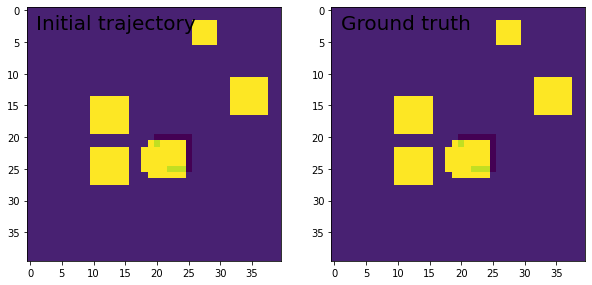

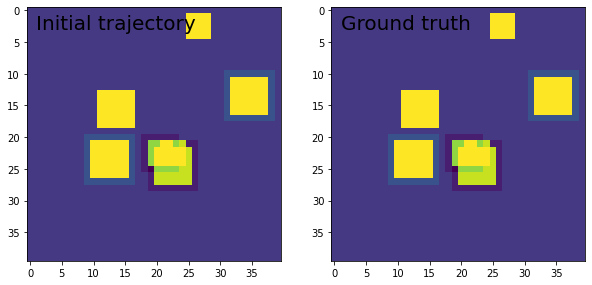

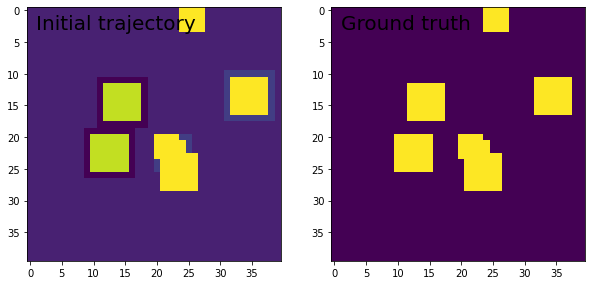

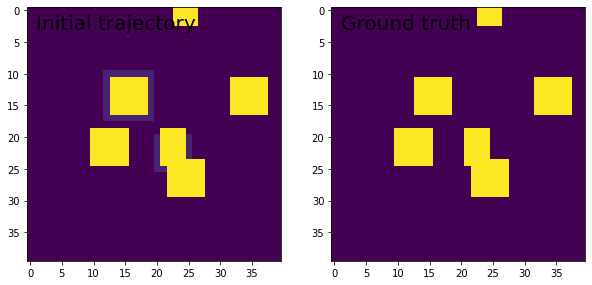

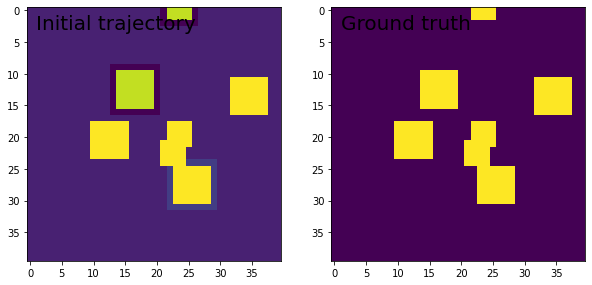

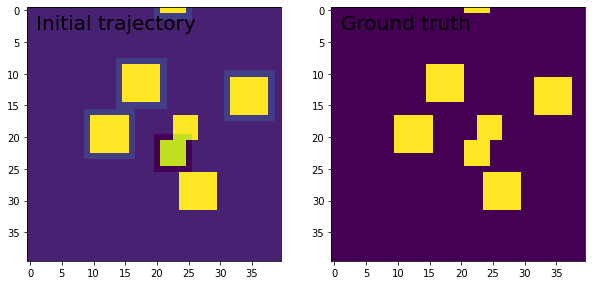

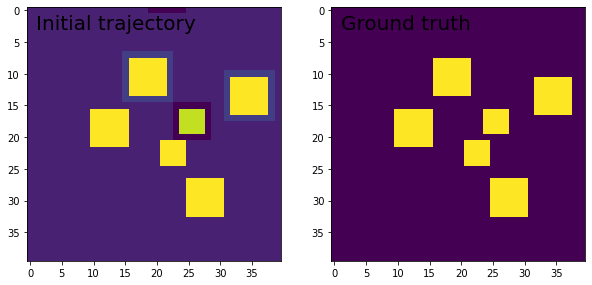

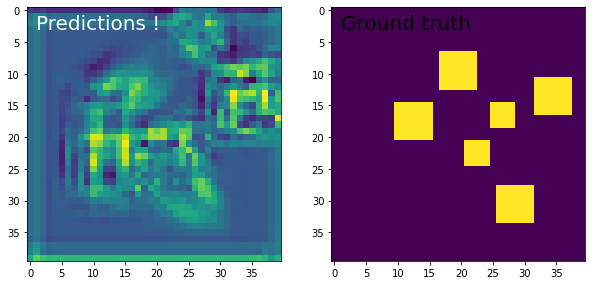

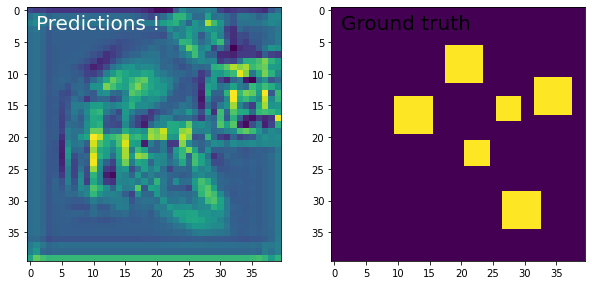

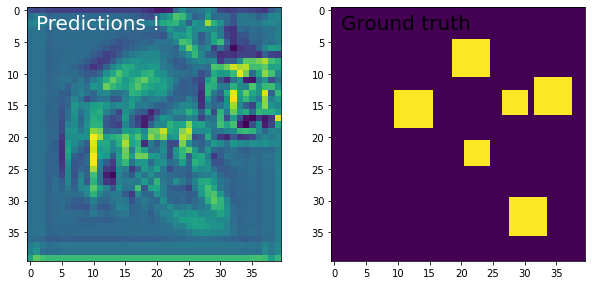

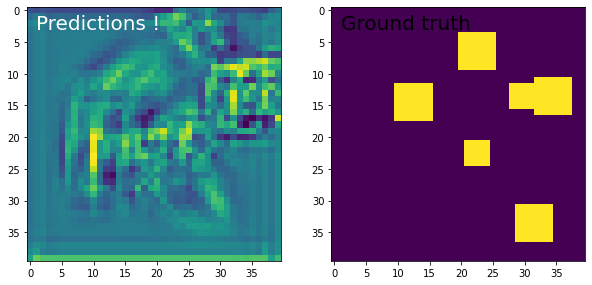

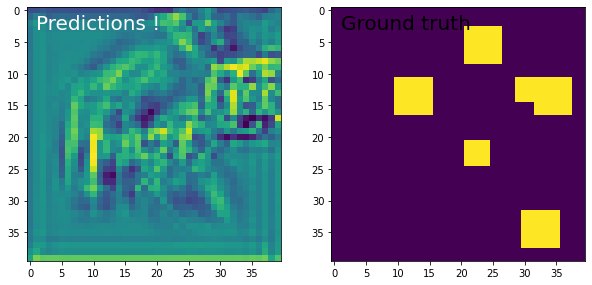

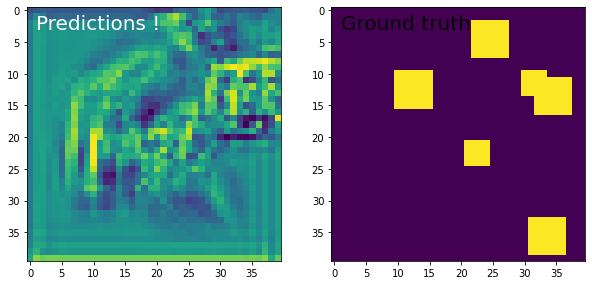

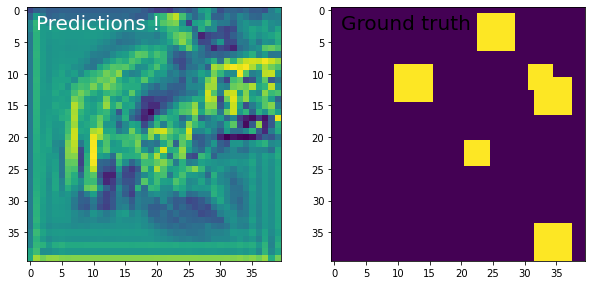

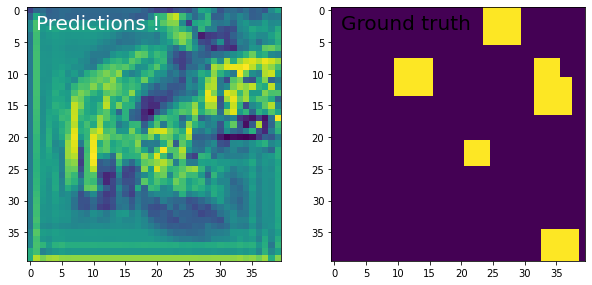

In [22]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

RNN ・・・Recurrentレイヤーに対する基底クラス
系列データを学習することができるニューラルネットワーク。勾配消失問題と重み衝突という二つの理由により長期的な特徴の学習は苦手。

SimpleRNNCell ・・・SimpleRNNのCellクラス．

GRUCell ・・・GRUレイヤーのためのCellクラス．
LSTMの代替となるモデルでLSTMより計算量が少なくてすむ。性能はLSTMと変わらないとされている。

LSTMCell ・・・LSTMレイヤーのためのcellクラス．
LSTM: 長期的特徴と短期的特徴を学習することができる。欠点は計算量が多いこと。

StackedRNNCells ・・・RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．効率的なstacked RNNを実装するために使われる．

CuDNNGRU ・・・CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作．

CuDNNLSTM ・・・CuDNNを利用した高速なLSTM実装．TensorFlowバックエンドでGPU上でのみ動作．

参考URL:
https://takoroy-ai.hatenadiary.jp/entry/2018/06/10/203531